In [ ]:
import pandas as pd

# cleaned_crime_data = pd.read_csv('final_cleaned_data.csv')
# delhi_women_data = pd.read_csv('final_cleaned_data.csv')
# delhi_women_data.rename(columns={'locality': 'location'}, inplace=True)
# merged_data = pd.merge(cleaned_crime_data, delhi_women_data, on='location', how='outer')
# merged_data.to_csv('final_cleaned_data.csv', index=False)
# print("Merged data saved to 'final_cleaned_data.csv'")


Merged data saved to 'final_cleaned_data.csv'


In [7]:
import pandas as pd

data_cleaned = pd.read_csv('final_cleaned_data.csv')




In [8]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data_cleaned['crime_type_encoded'] = label_encoder.fit_transform(data_cleaned['crime_type'])

crime_frequency = data_cleaned['location'].value_counts().reset_index()
crime_frequency.columns = ['location', 'crime_count']

data_cleaned = data_cleaned.merge(crime_frequency, on='location', how='left')

data_cleaned['Risk'] = 1  
print(data_cleaned.head())

          location offense_type crime_type         crime  crime_type_encoded  \
0  Connaught Place         rape        NaN  verbal abuse                   6   
1  Connaught Place         rape        NaN       assault                   6   
2  Connaught Place         rape        NaN  verbal abuse                   6   
3  Connaught Place         rape        NaN  verbal abuse                   6   
4  Connaught Place         rape        NaN       assault                   6   

   crime_count  Risk  
0         15.0     1  
1         15.0     1  
2         15.0     1  
3         15.0     1  
4         15.0     1  


In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

X = data_cleaned[['crime_type_encoded', 'crime_count']]
y = data_cleaned['Risk']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

model = RandomForestClassifier(class_weight='balanced', random_state=42)

imputer = SimpleImputer(strategy='mean')


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [14]:
print("Training Accuracy:", model.score(X_train, y_train))
print("Test Accuracy:", model.score(X_test, y_test))


Training Accuracy: 1.0
Test Accuracy: 1.0


In [19]:
def check_safety(location,  crime_threshold=5):
    location = location.strip().lower()

    if location not in data_cleaned['location'].str.lower().values:
        return "safe"
    
    location_data = data_cleaned[data_cleaned['location'].str.lower() == location]
    
    # Automatically return safe if crime count is below the threshold
    if location_data['crime_count'].sum() < crime_threshold:
        return "safe"
    
    input_data = pd.DataFrame({
        'crime_type_encoded': [location_data['crime_type_encoded'].iloc[0]],
        'crime_count': [location_data['crime_count'].iloc[0]]
    })

    prediction = model.predict(input_data)
    return "unsafe" if prediction[0] == 1 else "safe"


In [24]:
print(check_safety("Unknown"))

unsafe


In [150]:
import pickle
with open('crime_model.pkl', 'wb') as f:
    pickle.dump(model, f)


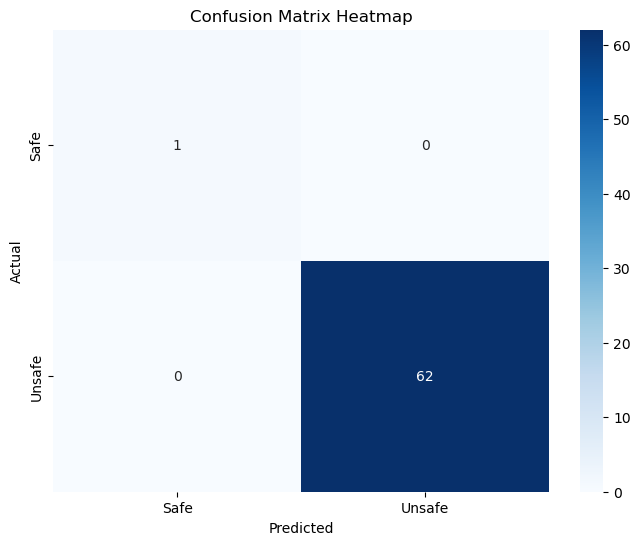

In [151]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

import matplotlib.pyplot as plt

y_pred = model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Safe', 'Unsafe'], yticklabels=['Safe', 'Unsafe'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()